## Lab Machine Learning 2 (Preprocessing)

#### Customer Analysis Round

In [243]:
# manejo bbdd
import pandas as pd
import numpy as np
import datetime

#gráficas
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#estadística
import math
from scipy.stats import norm
from scipy import stats #para box-cox entre otros
from scipy.stats import skew

#preprocesamiento
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#modelos y evaluación
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.metrics import mean_squared_error,r2_score

In [244]:
import warnings
warnings.filterwarnings("ignore")

#### First check a little bit the data we have and do a little bit of cleaning

In [245]:
data=pd.read_csv("Data/marketing_customer_analysis.csv")
data

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [246]:
data.info() #all values are non-null!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [247]:
data.drop_duplicates() #no duplicates

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [248]:
#putting the vavriable names to lower
cols = []
for i in range(len(data.columns)):
    cols.append(data.columns[i].lower())
data.columns = cols

In [249]:
data = data.rename(columns={'customer lifetime value':'cust_lifetime_value','monthly premium auto':'month_prem_auto', 'months since last claim':'months_last_claim','months since policy inception':'months_policy_incep', 'number of open complaints':'n_opencompl','number of policies':'n_policies', 'effective to date':'eff_date', 'vehicle class':'vehic_class', 'vehicle size':'vehic_size','sales channel':'sales_channel', 'renew offer type':'renew_offer', 'policy type':'policy_type', 'marital status':'marital_status', 'location code':'loc_code','total claim amount': 'tot_claim_amount'})

#### Create a dataframe only with numerical variables

In [250]:
numericals = data.select_dtypes(np.number)
numericals.head()

,cust_lifetime_value,income,month_prem_auto,months_last_claim,months_policy_incep,n_opencompl,n_policies,tot_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


In [251]:
len(numericals.columns)

8

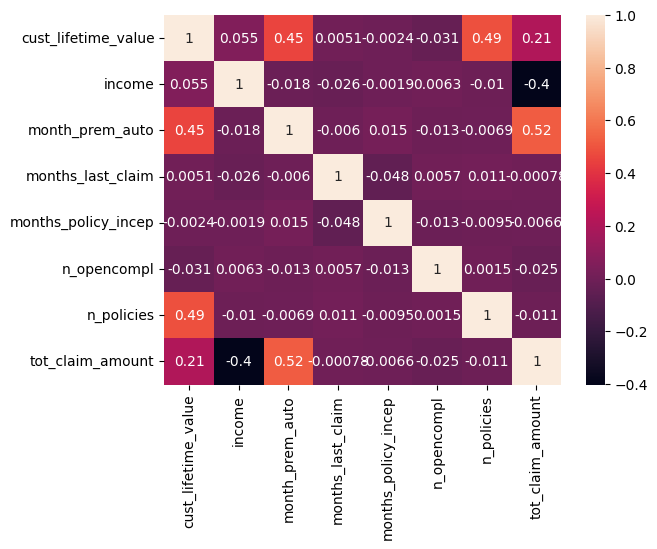

In [252]:
#let's check the correlation between numerical variables:
correl = numericals.corr(method = 'spearman')
sns.heatmap(correl, annot = True)
plt.show() #none is 0.9 or above so no need to drop any variable for now

In [253]:
numericals.columns

Index(['cust_lifetime_value', 'income', 'month_prem_auto', 'months_last_claim',
       'months_policy_incep', 'n_opencompl', 'n_policies', 'tot_claim_amount'],
      dtype='object')

#### Transform the variables using log and SQroot. 

In [254]:
#check the minimum values to see if there are negative values or 0. If we have 0s, use the sq root as log of 0 is not interesting here

In [255]:
numericals.describe()

,cust_lifetime_value,income,month_prem_auto,months_last_claim,months_policy_incep,n_opencompl,n_policies,tot_claim_amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


Two functions to transform:

In [256]:
def log_transform_clean_(x):
    x=np.log(x)
    if np.isfinite(x):
        return x
    else:
        return np.NAN 

In [257]:
def sqrt_transform_clean_(x):
    if np.isfinite(x) and x>=0:
        return np.sqrt(x)
    else:
        return np.NAN # We are returning NaNs so that we can replace them later

Check the distribution of the numerical variables

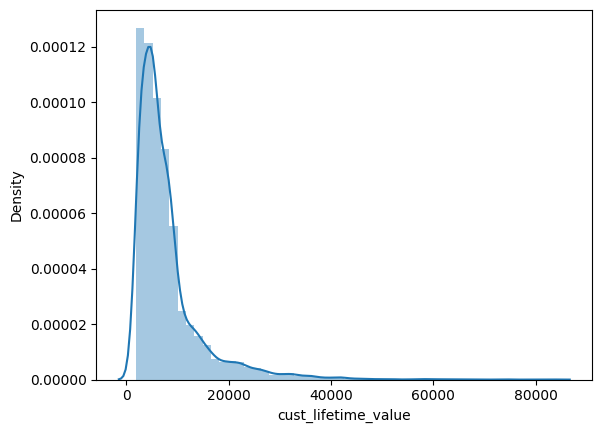

In [258]:
#let's check the distribution of the numerical variables:

sns.distplot(numericals['cust_lifetime_value'])
plt.show()

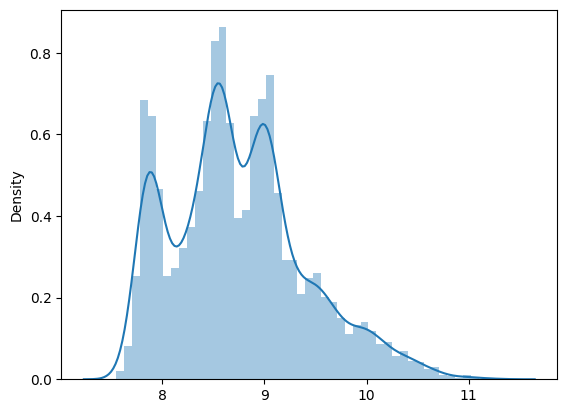

In [259]:
cust_lftm_val_log = list(map(log_transform_clean_, numericals['cust_lifetime_value']))
sns.distplot(cust_lftm_val_log)
plt.show()

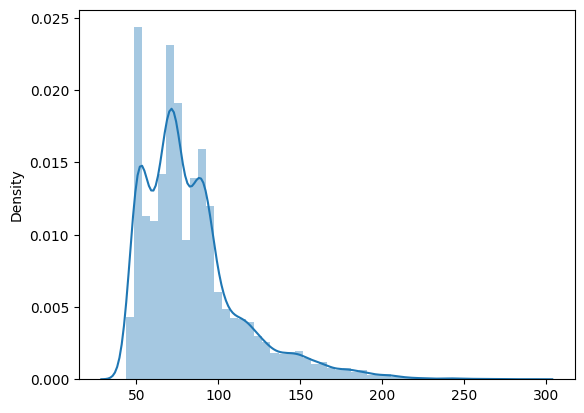

In [260]:
cust_lftm_val_sqrt = list(map(sqrt_transform_clean_, numericals['cust_lifetime_value']))
sns.distplot(cust_lftm_val_sqrt)
plt.show()

In [261]:
#this variable looks better transformed with the log option. From this one onwards I will only leave the chosen option.

In [262]:
numericals['cust_lftm_val_log']=cust_lftm_val_log
numericals=numericals.drop(['cust_lifetime_value'], axis=1) 
numericals.sample()

,income,month_prem_auto,months_last_claim,months_policy_incep,n_opencompl,n_policies,tot_claim_amount,cust_lftm_val_log
7251,94885,86,18,10,3,1,170.532133,8.151961


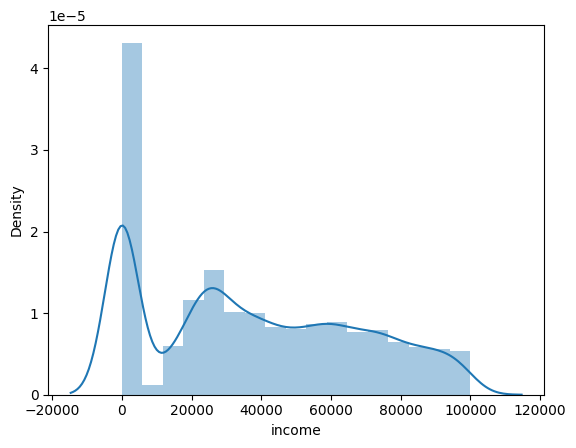

In [263]:
sns.distplot(numericals.income)
plt.show()

In [264]:
#we have lots of 0s here and they make no sense. So I will pass them to nulls and then impute them using the mean.

In [265]:
numericals.income.replace(0, np.nan, inplace=True)

In [266]:
numericals.income= numericals.income.fillna(np.mean(numericals.income))

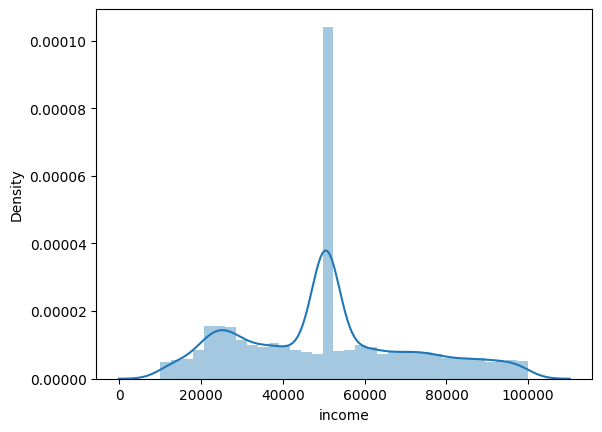

In [267]:
sns.distplot(numericals.income)
plt.show()

In [268]:
#it is quite centered now so I will not transform it yet.

In [269]:
numericals.income.info()

<class 'pandas.core.series.Series'>
RangeIndex: 9134 entries, 0 to 9133
Series name: income
Non-Null Count  Dtype  
--------------  -----  
9134 non-null   float64
dtypes: float64(1)
memory usage: 71.5 KB


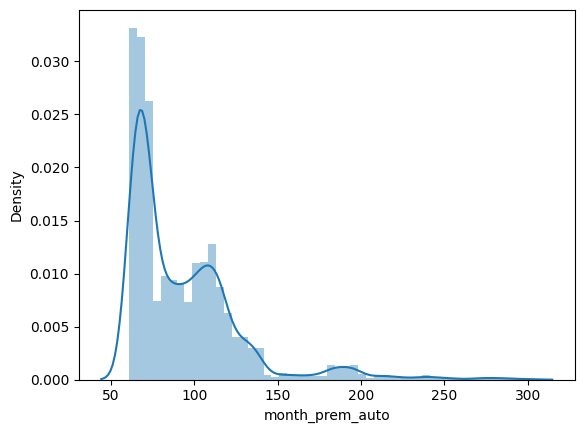

In [270]:
sns.distplot(numericals.month_prem_auto)
plt.show()

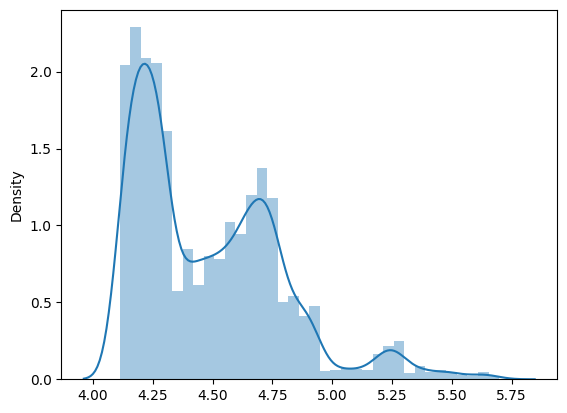

In [271]:
month_prem_auto_log = list(map(log_transform_clean_, numericals['month_prem_auto']))
sns.distplot(month_prem_auto_log)
plt.show()

In [272]:
numericals['month_prem_auto_log']=month_prem_auto_log
numericals=numericals.drop(['month_prem_auto'], axis=1) 
numericals.sample()

,income,months_last_claim,months_policy_incep,n_opencompl,n_policies,tot_claim_amount,cust_lftm_val_log,month_prem_auto_log
6292,21371.0,13,48,0,8,590.017366,8.560056,4.189655


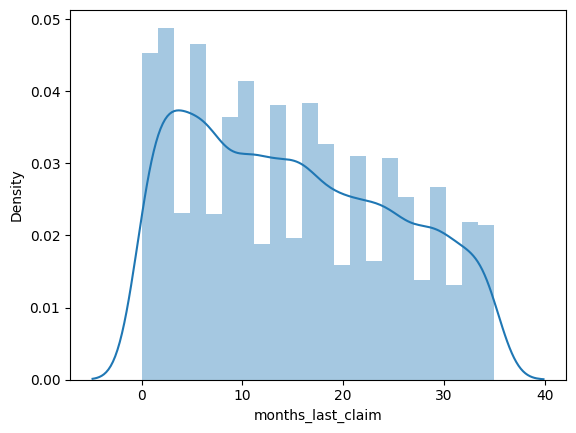

In [273]:
sns.distplot(numericals.months_last_claim) #I would not transform this one
plt.show()

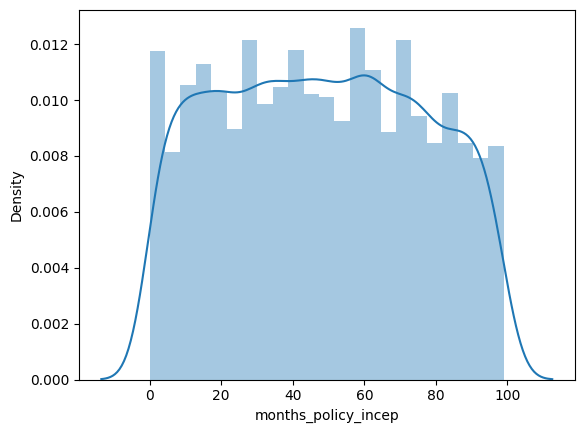

In [274]:
sns.distplot(numericals.months_policy_incep) #I wouold not transform this one. This one has more the shape of a uniform distribution.
plt.show()

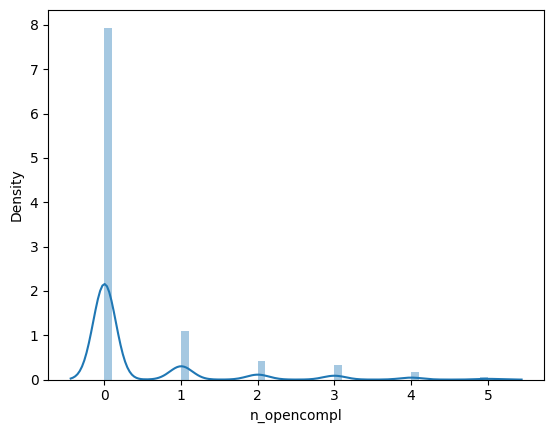

In [275]:
sns.distplot(numericals.n_opencompl) 
plt.show()

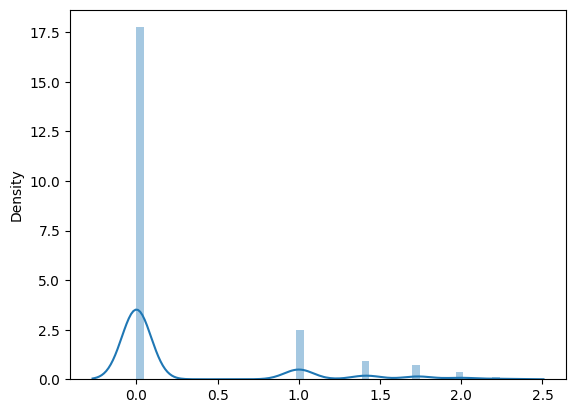

In [276]:
n_opencompl_sqrt = list(map(sqrt_transform_clean_, numericals['n_opencompl']))
sns.distplot(n_opencompl_sqrt)
plt.show()

In [277]:
numericals['n_opencompl_sqrt']=n_opencompl_sqrt
numericals=numericals.drop(['n_opencompl'], axis=1) 
numericals.sample()

,income,months_last_claim,months_policy_incep,n_policies,tot_claim_amount,cust_lftm_val_log,month_prem_auto_log,n_opencompl_sqrt
8287,50456.580461,18,81,3,352.130674,8.44194,4.219508,0.0


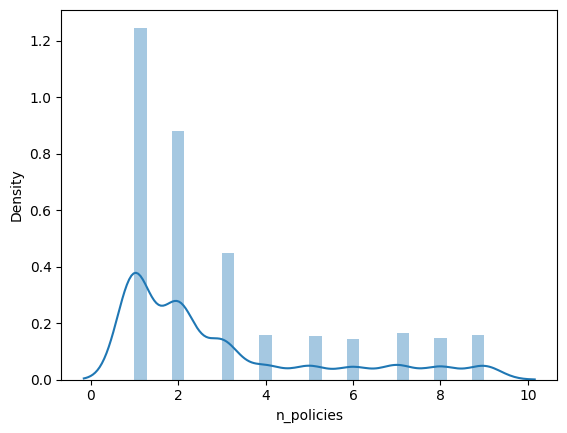

In [278]:
sns.distplot(numericals.n_policies)
plt.show()

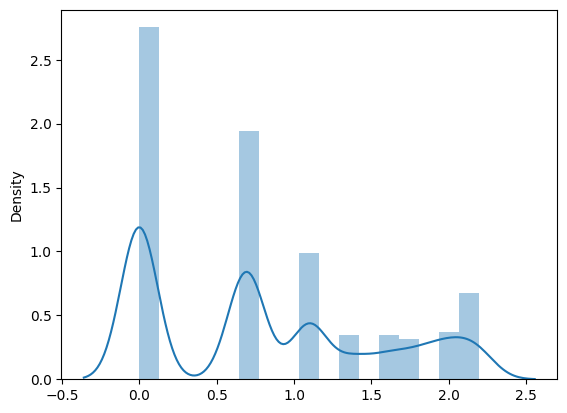

In [279]:
n_policies_log = list(map(log_transform_clean_, numericals['n_policies']))
sns.distplot(n_policies_log)
plt.show()

In [280]:
numericals['n_policies_log']=n_policies_log
numericals=numericals.drop(['n_policies'], axis=1) 
numericals.sample()

,income,months_last_claim,months_policy_incep,tot_claim_amount,cust_lftm_val_log,month_prem_auto_log,n_opencompl_sqrt,n_policies_log
2308,35984.0,7,68,275.577631,8.525135,4.85203,1.732051,0.0


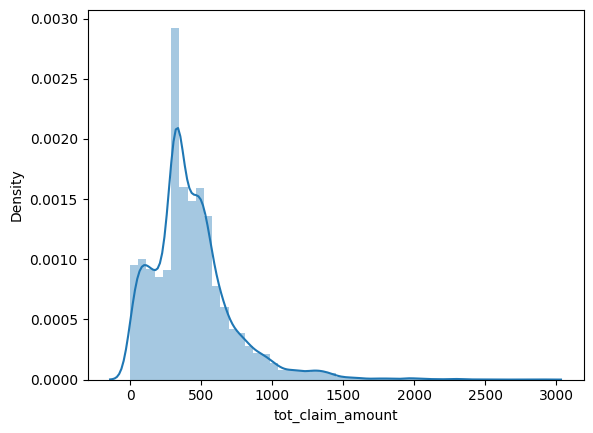

In [281]:
sns.distplot(numericals.tot_claim_amount) 
plt.show()

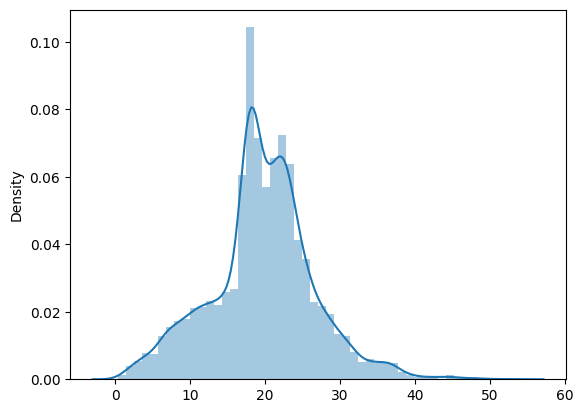

In [282]:
tot_claim_am_sqrt = list(map(sqrt_transform_clean_, numericals['tot_claim_amount']))
sns.distplot(tot_claim_am_sqrt)
plt.show()

In [283]:
numericals['tot_claim_am_sqrt']=tot_claim_am_sqrt
numericals=numericals.drop(['tot_claim_amount'], axis=1) 

In [284]:
numericals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   income               9134 non-null   float64
 1   months_last_claim    9134 non-null   int64  
 2   months_policy_incep  9134 non-null   int64  
 3   cust_lftm_val_log    9134 non-null   float64
 4   month_prem_auto_log  9134 non-null   float64
 5   n_opencompl_sqrt     9134 non-null   float64
 6   n_policies_log       9134 non-null   float64
 7   tot_claim_am_sqrt    9134 non-null   float64
dtypes: float64(6), int64(2)
memory usage: 571.0 KB


### Let's check for the outliers now!

In [285]:
#Let's look again at the graphical distributions and see if there are any outliers that should leave

In [286]:
numericals.columns

Index(['income', 'months_last_claim', 'months_policy_incep',
       'cust_lftm_val_log', 'month_prem_auto_log', 'n_opencompl_sqrt',
       'n_policies_log', 'tot_claim_am_sqrt'],
      dtype='object')

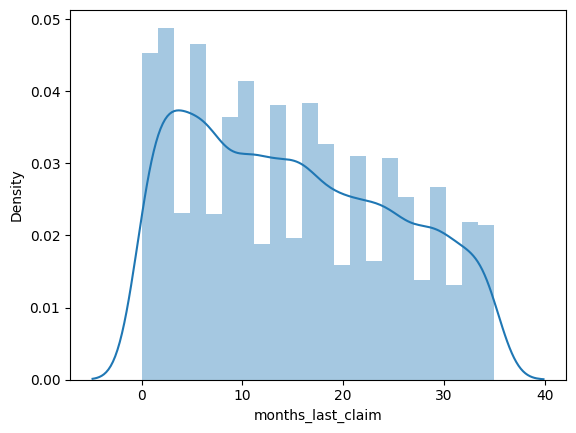

In [287]:
sns.distplot(numericals.months_last_claim)
plt.show() #no outliers here

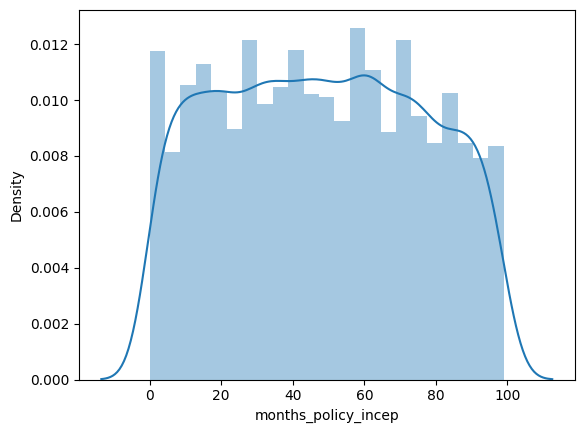

In [288]:
sns.distplot(numericals.months_policy_incep)
plt.show() #no outliers here

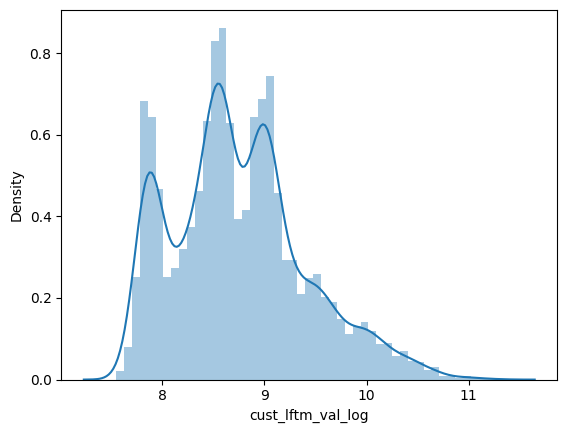

In [289]:
sns.distplot(numericals.cust_lftm_val_log)
plt.show() #no outliers here

In [290]:
#we have positive skewness. Outliers in this variable are only on the right side of the distribution
iqr = np.percentile(numericals['cust_lftm_val_log'],75) - np.percentile(numericals['cust_lftm_val_log'],25)
upper_limit = np.percentile(numericals['cust_lftm_val_log'],75) + 1.5*iqr
print(upper_limit)

10.313001003057334


In [291]:
len(numericals)

9134

In [292]:
new_df = numericals[numericals['cust_lftm_val_log'] > upper_limit]
len(new_df) #we only 'delete' 185 observations out of 9,134 --> (2%) --> ok

185

In [293]:
new_df

,income,months_last_claim,months_policy_incep,cust_lftm_val_log,month_prem_auto_log,n_opencompl_sqrt,n_policies_log,tot_claim_am_sqrt
50,24804.000000,1,28,10.510734,4.644391,0.0,0.693147,24.368633
51,33190.000000,18,95,10.418505,4.663439,0.0,0.693147,22.556595
79,61321.000000,0,30,10.971066,5.225747,1.0,0.693147,20.679246
125,42780.000000,10,27,10.348870,4.727388,1.0,0.693147,23.289483
232,41520.000000,18,70,10.381889,4.499810,0.0,0.693147,17.026571
...,...,...,...,...,...,...,...,...
8967,50456.580461,27,89,10.333514,4.700480,0.0,0.693147,31.697872
9034,50456.580461,24,49,10.669397,4.882802,0.0,0.693147,30.072883
9049,89546.000000,4,18,10.376758,5.583496,1.0,0.693147,49.526703
9062,50456.580461,7,4,10.315763,4.488636,0.0,0.693147,21.664711


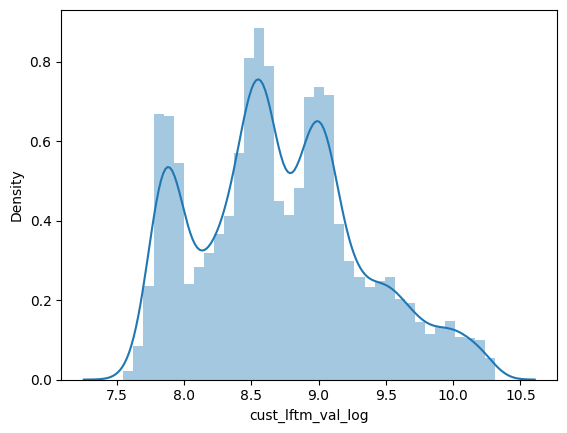

In [294]:
numericals = numericals[numericals['cust_lftm_val_log'] < upper_limit] #we delete the outliers from our dataframe
sns.distplot(numericals['cust_lftm_val_log'])
plt.show()

In [295]:
numericals.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8949 entries, 0 to 9133
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   income               8949 non-null   float64
 1   months_last_claim    8949 non-null   int64  
 2   months_policy_incep  8949 non-null   int64  
 3   cust_lftm_val_log    8949 non-null   float64
 4   month_prem_auto_log  8949 non-null   float64
 5   n_opencompl_sqrt     8949 non-null   float64
 6   n_policies_log       8949 non-null   float64
 7   tot_claim_am_sqrt    8949 non-null   float64
dtypes: float64(6), int64(2)
memory usage: 629.2 KB


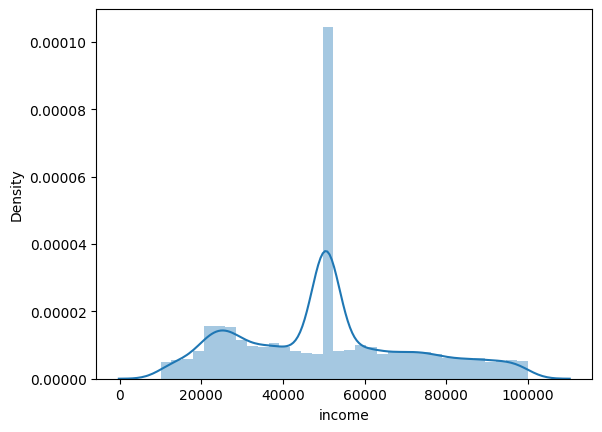

In [296]:
sns.distplot(numericals.income)
plt.show() #no outliers here

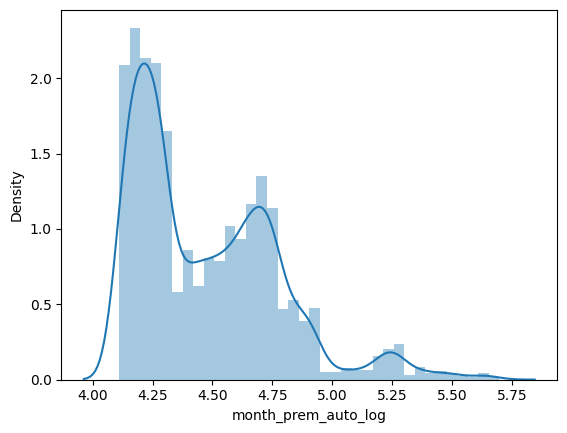

In [297]:
sns.distplot(numericals.month_prem_auto_log)
plt.show() 

In [298]:
iqr = np.percentile(numericals['month_prem_auto_log'],75) - np.percentile(numericals['month_prem_auto_log'],25)
upper_limit = np.percentile(numericals['month_prem_auto_log'],75) + 1.5*iqr
print(upper_limit)

5.376066510046389


In [299]:
new_df = numericals[numericals['month_prem_auto_log'] > upper_limit]
len(new_df)

99

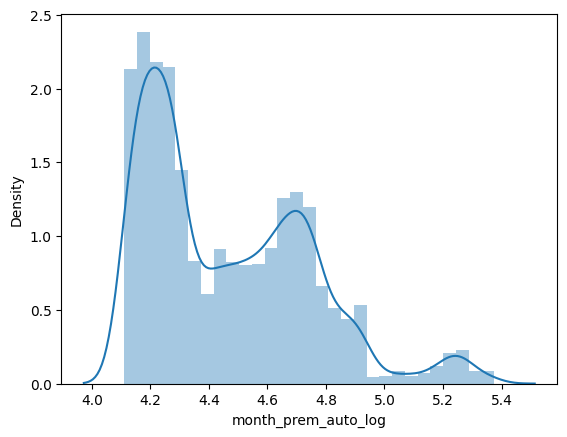

In [300]:
numericals = numericals[numericals['month_prem_auto_log'] < upper_limit]
sns.distplot(numericals['month_prem_auto_log'])
plt.show()

In [301]:
numericals.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8850 entries, 0 to 9133
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   income               8850 non-null   float64
 1   months_last_claim    8850 non-null   int64  
 2   months_policy_incep  8850 non-null   int64  
 3   cust_lftm_val_log    8850 non-null   float64
 4   month_prem_auto_log  8850 non-null   float64
 5   n_opencompl_sqrt     8850 non-null   float64
 6   n_policies_log       8850 non-null   float64
 7   tot_claim_am_sqrt    8850 non-null   float64
dtypes: float64(6), int64(2)
memory usage: 622.3 KB


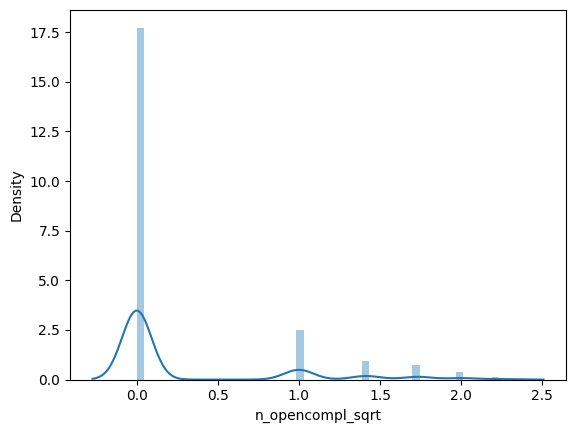

In [302]:
sns.distplot(numericals.n_opencompl_sqrt)
plt.show() #no outliers here

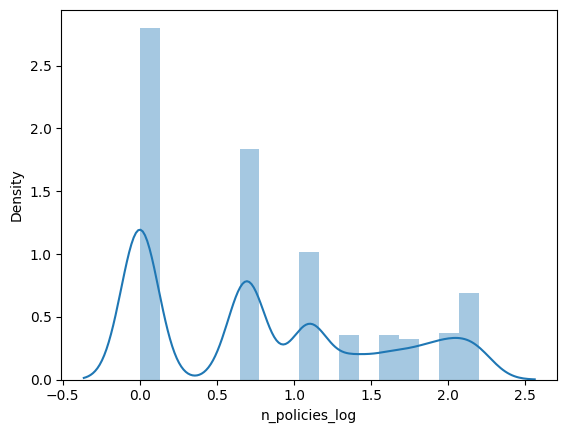

In [303]:
sns.distplot(numericals.n_policies_log)
plt.show() #no outliers here

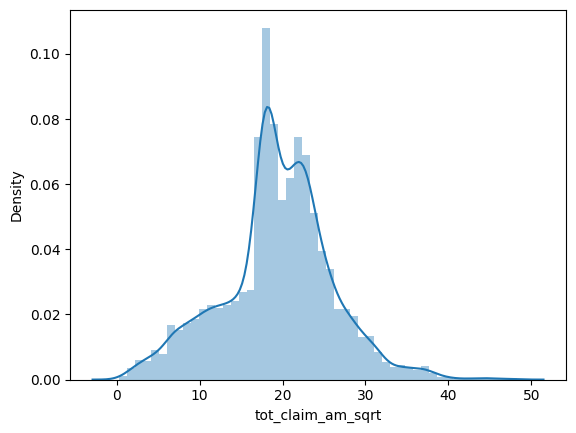

In [304]:
sns.distplot(numericals.tot_claim_am_sqrt)
plt.show() #no outliers here

In [305]:
iqr=np.percentile(numericals['tot_claim_am_sqrt'],75)-np.percentile(numericals['tot_claim_am_sqrt'],25)
upper_limit= np.percentile(numericals['tot_claim_am_sqrt'],75)+1.5*iqr
lower_limit= np.percentile(numericals['tot_claim_am_sqrt'],25)-1.5*iqr


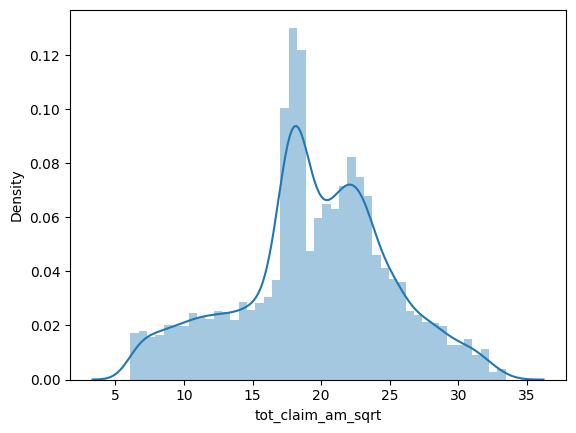

In [306]:
numericals=numericals[(numericals['tot_claim_am_sqrt']>lower_limit)&(numericals['tot_claim_am_sqrt']<upper_limit)]
sns.distplot(numericals['tot_claim_am_sqrt'])
plt.show()

In [307]:
numericals.info() #still enough data and less outliers!

<class 'pandas.core.frame.DataFrame'>
Index: 8374 entries, 0 to 9133
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   income               8374 non-null   float64
 1   months_last_claim    8374 non-null   int64  
 2   months_policy_incep  8374 non-null   int64  
 3   cust_lftm_val_log    8374 non-null   float64
 4   month_prem_auto_log  8374 non-null   float64
 5   n_opencompl_sqrt     8374 non-null   float64
 6   n_policies_log       8374 non-null   float64
 7   tot_claim_am_sqrt    8374 non-null   float64
dtypes: float64(6), int64(2)
memory usage: 588.8 KB


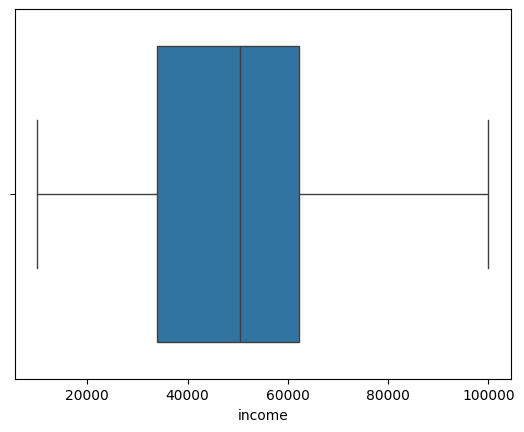

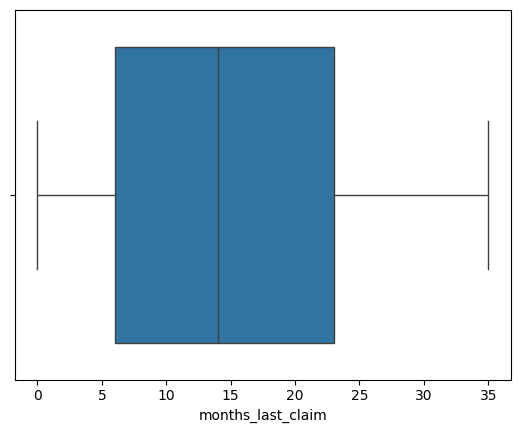

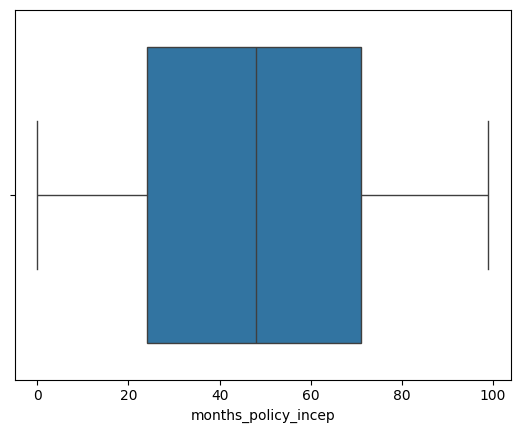

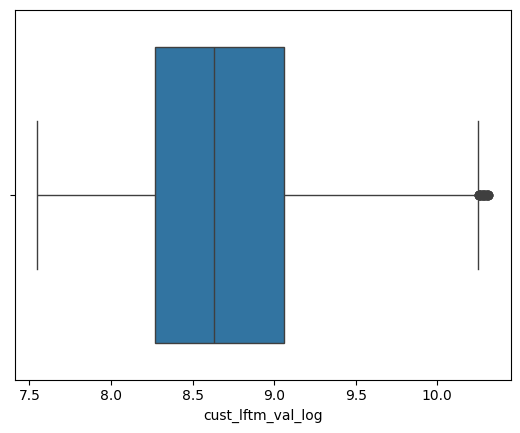

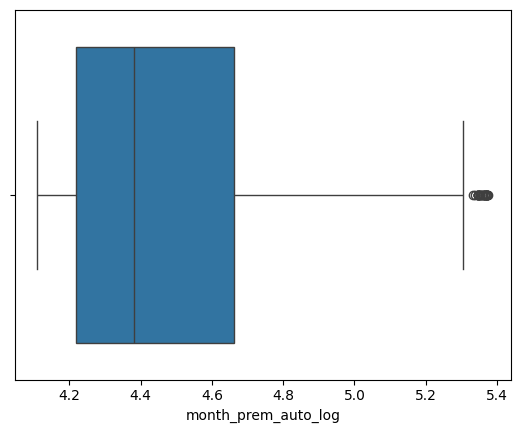

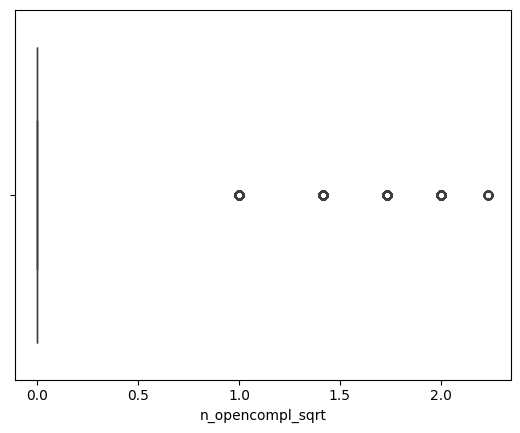

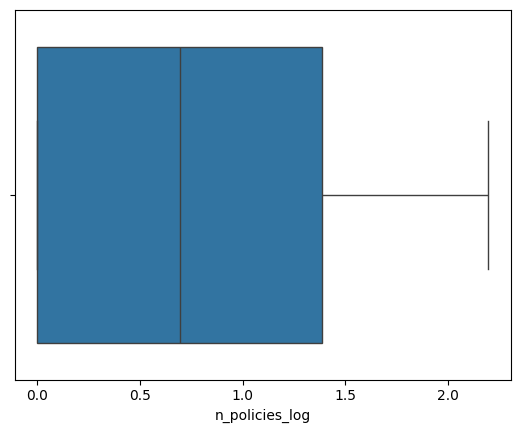

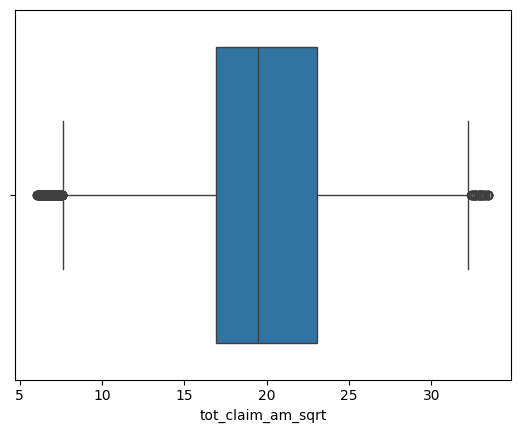

In [308]:
for columns in numericals.columns:
    sns.boxplot(x=numericals[columns])
    plt.show()

#with boxplots we can see that most outliers left, except for the open_compl variable, which is not very useful as most of it is 0s

In [309]:
print(data.shape)
print(numericals.shape) #we deleted less than 20% of data

(9134, 24)
(8374, 8)


In [310]:
numericals.reset_index(drop=True, inplace=True)

In [311]:
numericals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8374 entries, 0 to 8373
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   income               8374 non-null   float64
 1   months_last_claim    8374 non-null   int64  
 2   months_policy_incep  8374 non-null   int64  
 3   cust_lftm_val_log    8374 non-null   float64
 4   month_prem_auto_log  8374 non-null   float64
 5   n_opencompl_sqrt     8374 non-null   float64
 6   n_policies_log       8374 non-null   float64
 7   tot_claim_am_sqrt    8374 non-null   float64
dtypes: float64(6), int64(2)
memory usage: 523.5 KB


### Normalize columns

In [312]:
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler

In [313]:
Y =numericals['tot_claim_am_sqrt']
X_=numericals.drop(['tot_claim_am_sqrt'], axis=1)

In [314]:
X_.sample()

,income,months_last_claim,months_policy_incep,cust_lftm_val_log,month_prem_auto_log,n_opencompl_sqrt,n_policies_log
7882,20228.0,3,43,9.250423,4.615121,1.0,0.693147


In [315]:
transformer=MinMaxScaler().fit(X_)
transformer
x_scaled=transformer.transform(X_)
print(x_scaled.shape)
pd.DataFrame(x_scaled)

(8374, 7)


,0,1,2,3,4,5,6
0,0.514064,0.914286,0.050505,0.135910,0.097463,0.000000,0.000000
1,0.430601,0.514286,0.383838,0.692913,0.451800,0.000000,0.315465
2,0.449386,0.514286,0.656566,0.504048,0.437016,0.000000,0.885622
3,0.375778,0.342857,0.444444,0.142418,0.142032,0.000000,0.000000
4,0.587755,0.400000,0.949495,0.531835,0.097463,0.000000,0.315465
...,...,...,...,...,...,...,...
8369,0.688250,0.514286,0.898990,0.908784,0.142032,0.000000,0.315465
8370,0.128602,0.400000,0.282828,0.177066,0.204503,0.000000,0.000000
8371,0.449386,0.257143,0.373737,0.527763,0.262398,0.774597,0.315465
8372,0.132349,0.971429,0.030303,0.498257,0.358647,0.000000,0.500000


In [316]:
pd.DataFrame(x_scaled).describe()

,0,1,2,3,4,5,6
count,8374.000000,8374.000000,8374.000000,8374.000000,8374.000000,8374.000000,8374.000000
mean,0.448054,0.429701,0.483140,0.414677,0.270290,0.121337,0.365260
std,0.234534,0.287237,0.281736,0.216631,0.215459,0.250239,0.338857
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.265082,0.171429,0.242424,0.259931,0.085917,0.000000,0.000000
50%,0.449386,0.400000,0.484848,0.391977,0.214451,0.000000,0.315465
75%,0.580764,0.657143,0.717172,0.547350,0.437016,0.000000,0.630930
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [317]:
#Normalizando 

transformer=StandardScaler().fit(X_)
x_normalized=transformer.transform(X_)
print(x_normalized.shape)
pd.DataFrame(x_normalized)

(8374, 7)


,0,1,2,3,4,5,6
0,0.281470,1.687156,-1.535700,-1.286908,-0.802179,-0.484913,-1.077984
1,-0.074420,0.294495,-0.352487,1.284455,0.842484,-0.484913,-0.146960
2,0.005679,0.294495,0.615597,0.412573,0.773866,-0.484913,1.535731
3,-0.308187,-0.302359,-0.137357,-1.256860,-0.595312,-0.484913,-1.077984
4,0.595688,-0.103408,1.655390,0.540848,-0.802179,-0.484913,-0.146960
...,...,...,...,...,...,...,...
8369,1.024206,0.294495,1.476116,2.281003,-0.595312,-0.484913,-0.146960
8370,-1.362155,-0.103408,-0.711036,-1.096912,-0.305352,-0.484913,-1.077984
8371,0.005679,-0.600786,-0.388341,0.522051,-0.036628,2.610702,-0.146960
8372,-1.346179,1.886107,-1.607410,0.385840,0.410112,-0.484913,0.397654


In [318]:
pd.DataFrame(x_normalized).describe()

,0,1,2,3,4,5,6
count,8.374000e+03,8.374000e+03,8.374000e+03,8.374000e+03,8.374000e+03,8.374000e+03,8.374000e+03
mean,7.806297e-17,-5.653202e-17,-5.462287e-17,2.101336e-15,2.341465e-15,-1.318373e-16,1.100942e-16
std,1.000060e+00,1.000060e+00,1.000060e+00,1.000060e+00,1.000060e+00,1.000060e+00,1.000060e+00
min,-1.910520e+00,-1.496068e+00,-1.714974e+00,-1.914324e+00,-1.254556e+00,-4.849131e-01,-1.077984e+00
25%,-7.802020e-01,-8.992136e-01,-8.544558e-01,-7.143719e-01,-8.557700e-01,-4.849131e-01,-1.077984e+00
50%,5.679189e-03,-1.034077e-01,6.062885e-03,-1.047914e-01,-2.591761e-01,-4.849131e-01,-1.469598e-01
75%,5.658803e-01,7.918739e-01,8.307266e-01,6.124727e-01,7.738664e-01,-4.849131e-01,7.840643e-01
max,2.353518e+00,1.985583e+00,1.834665e+00,2.702096e+00,3.386971e+00,3.511508e+00,1.873293e+00


In [325]:
X = sm.add_constant(x_normalized)
model = sm.OLS(Y,X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      tot_claim_am_sqrt   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                     390.5
Date:                Mon, 29 Apr 2024   Prob (F-statistic):               0.00
Time:                        22:48:31   Log-Likelihood:                -25098.
No. Observations:                8374   AIC:                         5.021e+04
Df Residuals:                    8366   BIC:                         5.027e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.4835      0.053    367.721      0.0

In [324]:
X = sm.add_constant(x_scaled)
model = sm.OLS(Y,X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      tot_claim_am_sqrt   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                     390.5
Date:                Mon, 29 Apr 2024   Prob (F-statistic):               0.00
Time:                        22:48:23   Log-Likelihood:                -25098.
No. Observations:                8374   AIC:                         5.021e+04
Df Residuals:                    8366   BIC:                         5.027e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.1541      0.203     94.556      0.0

In [321]:
#using sklearn

In [322]:
lm = linear_model.LinearRegression()
model = lm.fit(x_normalized,Y)
print("R2 value is = ",round(lm.score(x_normalized,Y),2)) 

R2 value is =  0.25


In [323]:
lm = linear_model.LinearRegression()
model = lm.fit(x_scaled,Y)
print("R2 value is = ",round(lm.score(x_scaled,Y),2)) 

R2 value is =  0.25


Conclusion: with respect to the previous lab, where the variables were not transformed or the outliers were not treated the R2 decreases. This means that the model
is not ok or that the model does not show a linear relationship of the Y variable with the X variables. With R2=0.25 this means that only 25% of the variations in
Y are explained by variations in the considered Xs.

Let's plot the relationship between the Y and the different Xs to check whether there is a linear relationship between them.

In [333]:
numericals.columns

Index(['income', 'months_last_claim', 'months_policy_incep',
       'cust_lftm_val_log', 'month_prem_auto_log', 'n_opencompl_sqrt',
       'n_policies_log', 'tot_claim_am_sqrt'],
      dtype='object')

<Axes: xlabel='income', ylabel='tot_claim_am_sqrt'>

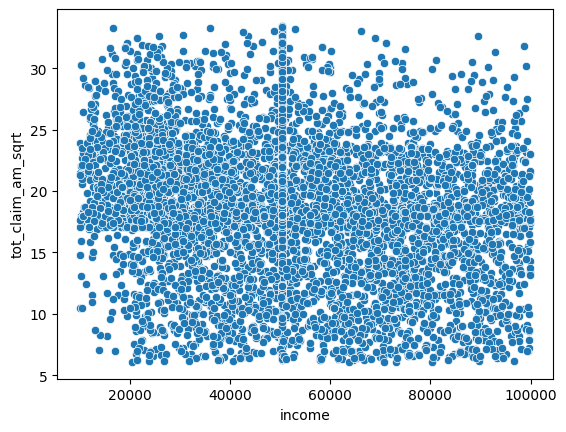

In [335]:
sns.scatterplot(x='income', y='tot_claim_am_sqrt', data=numericals) #no linear relationship at all

<Axes: xlabel='months_last_claim', ylabel='tot_claim_am_sqrt'>

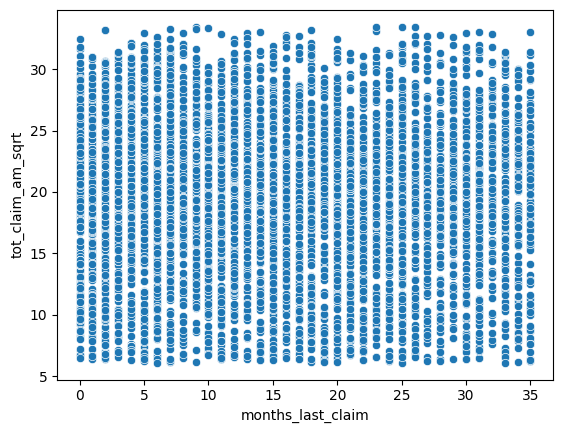

In [336]:
sns.scatterplot(x='months_last_claim', y='tot_claim_am_sqrt', data=numericals) #no linear relationship at all

<Axes: xlabel='months_policy_incep', ylabel='tot_claim_am_sqrt'>

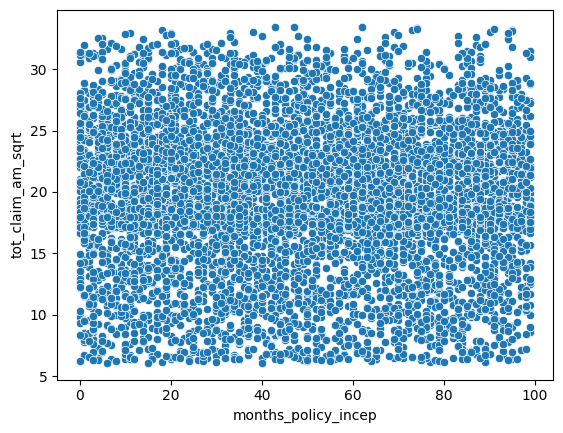

In [337]:
sns.scatterplot(x='months_policy_incep', y='tot_claim_am_sqrt', data=numericals) #no linear relationship at all

<Axes: xlabel='cust_lftm_val_log', ylabel='tot_claim_am_sqrt'>

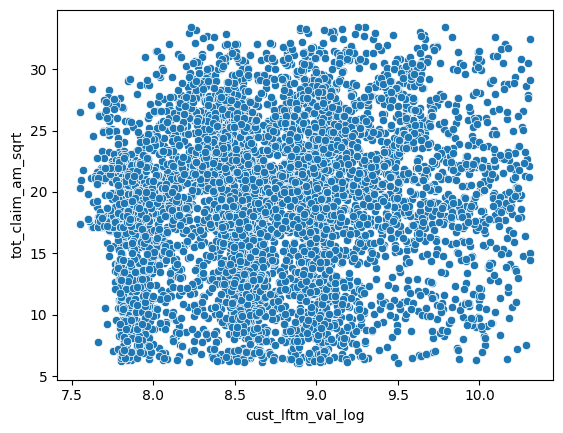

In [343]:
sns.scatterplot(x='cust_lftm_val_log', y='tot_claim_am_sqrt', data=numericals) #no linear relationship at all

<Axes: xlabel='month_prem_auto_log', ylabel='tot_claim_am_sqrt'>

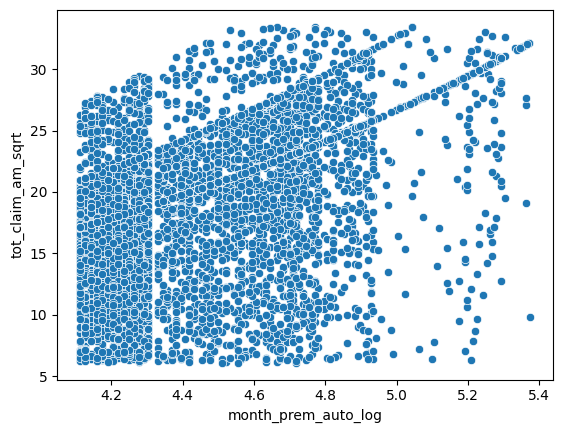

In [340]:
sns.scatterplot(x='month_prem_auto_log', y='tot_claim_am_sqrt', data=numericals) #no linear relationship

<Axes: xlabel='n_opencompl_sqrt', ylabel='tot_claim_am_sqrt'>

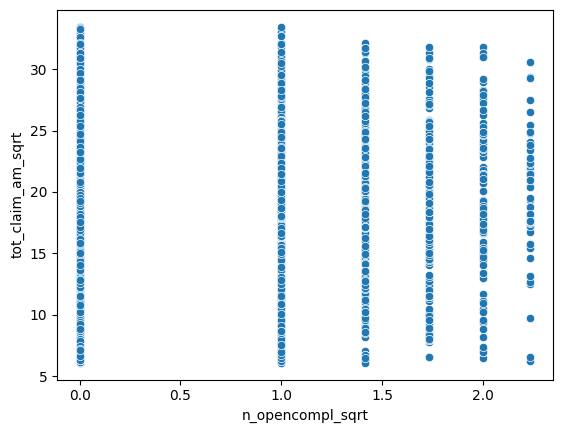

In [345]:
sns.scatterplot(x='n_opencompl_sqrt', y='tot_claim_am_sqrt', data=numericals) #no linear relationship at all

<Axes: xlabel='n_policies_log', ylabel='tot_claim_am_sqrt'>

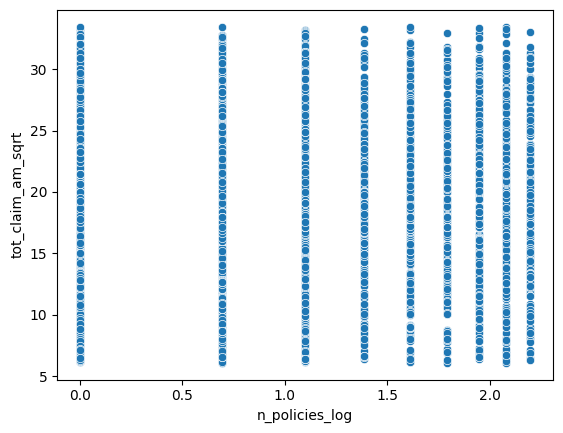

In [346]:
sns.scatterplot(x='n_policies_log', y='tot_claim_am_sqrt', data=numericals) #no linear relationship at all

There are no linear relationships between the variable Y and the independent variables (X). For this reason, a linear regression model is not good to show the 
relationship between these variables. After transforming them and dealing with outliers, p-values generally improve with respect to the model including the non-transformed variables from the previous lab, but the R2 is lower (as the model does not fit well)